<a href="https://colab.research.google.com/github/chrisogonas/coo_dataviz/blob/main/DataVizDesignChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataViz Challenge

## Library Imports

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.precision", 2)
sns.set(rc={'figure.figsize':(9.7,6.27)})

## Load data file

In [7]:
df = pd.read_csv('/ParticipantData.csv')
df.head()

Subject Number  Gender  ... Wrist Circumference (mm) Proposed Band Size
0            1012  Female  ...                      146                  3
1             823  Female  ...                      154                  4
2              81  Female  ...                      146                  3
3             948  Female  ...                      144                  3
4            1719  Female  ...                      164                  5

[5 rows x 6 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Proposed Band Size Distribution - overall

In [309]:
fig = sns.kdeplot(data=df['Proposed Band Size'], shade=True)
fig.figure.suptitle("Proposed Band Size Distribution", fontsize = 16)


Text(0.5, 0.98, 'Proposed Band Size Distribution')

## Basic statistical characteristics of numerical features

In [216]:
df.describe()

Subject Number  Wrist Circumference (mm)  Proposed Band Size
count         2000.00                   2000.00             2000.00
mean          1000.50                    167.54                5.30
std            577.49                     12.92                1.32
min              1.00                    129.00                1.00
25%            500.75                    158.00                4.00
50%           1000.50                    167.00                5.00
75%           1500.25                    177.00                6.00
max           2000.00                    204.00                9.00

## Analysis by Ethnicity, Gender and Sizes

In [8]:
df3 = df.groupby(['Ethnicity']).agg({'Proposed Band Size':  ['mean','count']})
df3.columns = ['Mean','Count']
df3 = df3.reset_index()
df3.sort_values(by=['Mean','Count'], ascending=False)

Ethnicity  Mean  Count
1              East Asian  5.89    950
3             South Asian  5.76     37
0  Black/African American  5.23     31
4                   White  4.72    950
2         Hispanic/Latinx  4.62     32

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

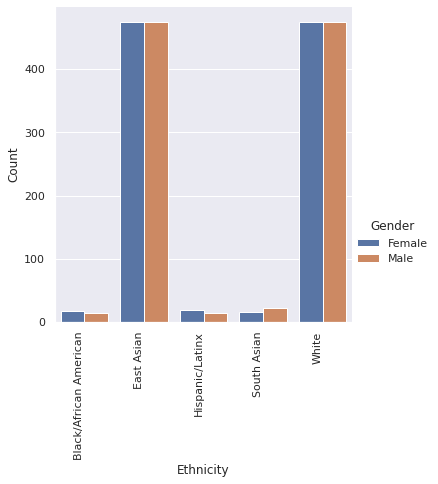

In [320]:
sns.catplot(x="Ethnicity", y="Count", hue="Gender", kind="bar", data=df2)
plt.xticks(rotation=90, ha='right')

In [ ]:
df3 = df.groupby(['Ethnicity','Proposed Band Size']).agg({'Proposed Band Size':  ['count']})
df3.columns = ['Count']
df3 = df3.reset_index()
df3.sort_values(by=['Proposed Band Size'], ascending=False)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

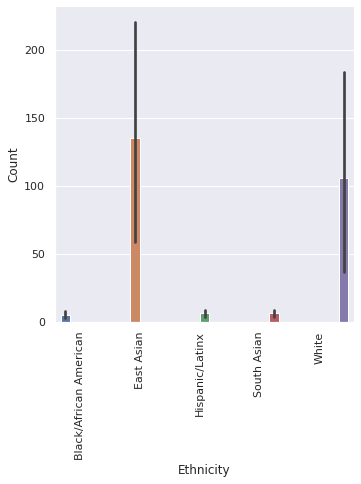

In [332]:
sns.catplot(x="Ethnicity", y="Count", hue="Ethnicity", kind="bar", data=df3)
plt.xticks(rotation=90, ha='right')

In [ ]:
df3

## Analysis by Gender and Sizes

In [272]:
df3 = df.groupby(['Gender','Proposed Band Size']).agg({'Proposed Band Size':  ['count']})
df3.columns = ['Count']
df3 = df3.reset_index()
df3.sort_values(by=['Proposed Band Size'], ascending=False)

Gender  Proposed Band Size  Count
15    Male                   9      5
6   Female                   8      7
14    Male                   8     74
5   Female                   7     49
13    Male                   7    261
4   Female                   6    171
12    Male                   6    312
3   Female                   5    320
11    Male                   5    218
2   Female                   4    313
10    Male                   4    100
1   Female                   3    135
9     Male                   3     26
0   Female                   2      5
8     Male                   2      3
7     Male                   1      1

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

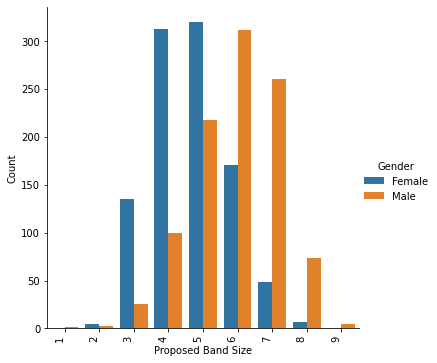

In [273]:
sns.catplot(x="Proposed Band Size", y="Count", hue="Gender", kind="bar", data=df3)
plt.xticks(rotation=90, ha='right')

## Analysis by Gender and Ethnicity - drop

In [ ]:
# df2 = df.groupby(['Gender', 'Ethnicity']).agg({'Wrist Circumference (mm)': ['mean','count']})
# df2.columns = ['Mean','Count']
# df2 = df2.reset_index()
# df2.sort_values(by=['Mean','Count'], ascending=False)

In [ ]:
# sns.catplot(x="Ethnicity", y="Mean", hue="Gender", kind="bar", data=df2)
# plt.xticks(rotation=90, ha='right')

## Analysis by Gender and Age

In [9]:
df3 = df.groupby(['Gender', 'Age','Proposed Band Size']).agg({'Proposed Band Size':  ['count']})
df3.columns = ['Count']
df3 = df3.reset_index()
df3.sort_values(by=['Count'], ascending=False)

Gender    Age  Proposed Band Size  Count
14  Female  40-49                   4     75
21  Female    <20                   5     69
7   Female  30-39                   4     69
59    Male    <20                   7     68
8   Female  30-39                   5     67
..     ...    ...                 ...    ...
39    Male  20-29                   9      1
61    Male    <20                   9      1
24  Female    <20                   8      1
12  Female  40-49                   2      1
68    Male    >50                   9      1

[69 rows x 4 columns]

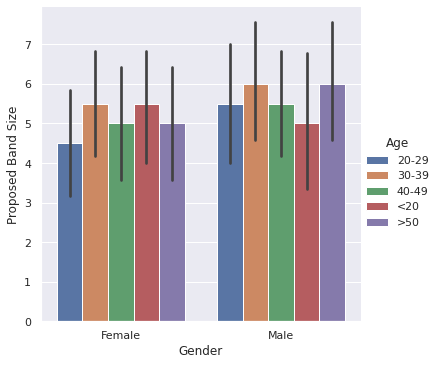

In [11]:
sns.catplot(x="Gender", y="Proposed Band Size", hue="Age", kind="bar", data=df3)

## Analysis by Age and Sizes

In [ ]:
df4 = df.groupby(['Age','Proposed Band Size']).agg({'Proposed Band Size':  ['count']})
df4.columns = ['Count']
df4 = df4.reset_index()
df4.sort_values(by=['Count'], ascending=False)

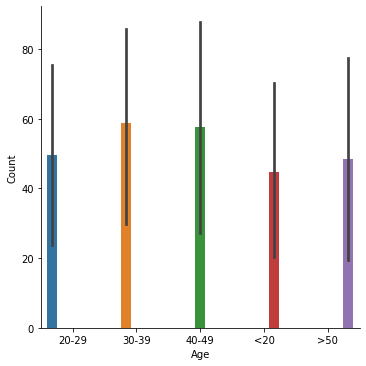

In [289]:
sns.catplot(x="Age", y="Count", hue="Age", kind="bar", data=df4)

In [14]:
df3 = df.groupby(['Age']).agg({'Proposed Band Size':  ['count']})
df3.columns = ['Count']
df3 = df3.reset_index()
df3.sort_values(by=['Count'], ascending=False)

Age  Count
1  30-39    412
2  40-49    403
3    <20    402
0  20-29    396
4    >50    387